# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

C:\Users\achand2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\achand2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

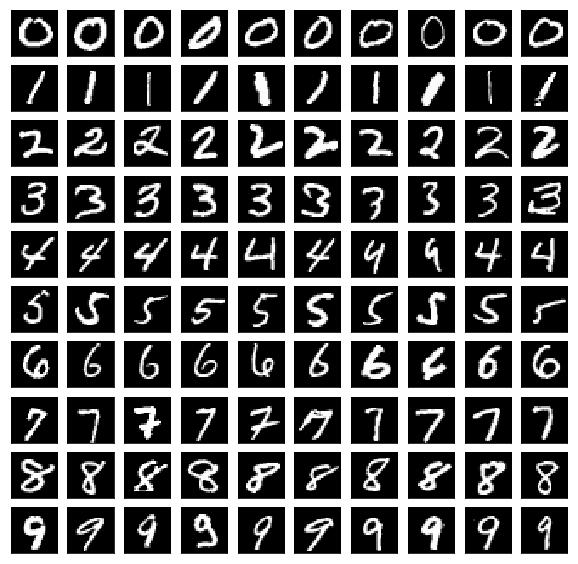

In [58]:
def P1(num_examples=10):

### STUDENT START ###
    # Figure out unique labels
    uniq_labels = np.unique(Y)
    
    #Set the size of output grid 
    plt.rcParams['figure.figsize'] = 10,10
    
    # For each label in 0-9 choose first 10 examples of each from X
    for i in uniq_labels:
                
        sampleX=X[Y==int(i)][0:10] # Shape is (10,784)
        
        for j in range(num_examples):
            # Plot the samples
            plotX=np.reshape(sampleX[j],(28,28))            
            ax1=plt.subplot(10, 10,int(i*10)+int(j+1))
            ax1.set_xticks([])
            ax1.set_yticks([])
            plt.imshow(plotX,cmap = 'gray')
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [6]:
def P2(k_values):

### STUDENT START ###
    for i in k_values:
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(mini_train_data, mini_train_labels)        
        if i == 1:
            print ('Details for k = 1: \n', classification_report(dev_labels, neigh.predict(dev_data)))
        print ('Accuracy of k = ', i, ': ', neigh.score(dev_data, dev_labels))
            
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Details for k = 1: 
              precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy of k =  1 :  0.888
Accuracy of k =  3 :  0.878
Accuracy of k =  5 :  0.869
Accuracy of k =  7 :  0.865
Accuracy of k =  9 :  0.863


ANSWER: 

The k=1 has the highest accuracy of ~89%. The accuracy of the model decreases with increasing number of neighbors taken into account.

The number 9 is the most difficult digit for K=1 as it has the lowest f1-score (we rely on f1-score since it factors in both precision and recall)

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [7]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for size in train_sizes:
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(train_data[:size], train_labels[:size])   
        start_time = time.time()
        neigh.predict(dev_data)
        predict_time = time.time() - start_time
        
        print ('Accuracy with train size = ', size, 'is: ', neigh.score(dev_data, dev_labels))
        print ('Prediction Time = ', round(predict_time,3), ' seconds \n')

        accuracies.append([size, neigh.score(dev_data, dev_labels)])
        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Accuracy with train size =  100 is:  0.72
Prediction Time =  0.249  seconds 

Accuracy with train size =  200 is:  0.786
Prediction Time =  0.584  seconds 

Accuracy with train size =  400 is:  0.841
Prediction Time =  1.166  seconds 

Accuracy with train size =  800 is:  0.884
Prediction Time =  1.963  seconds 

Accuracy with train size =  1600 is:  0.902
Prediction Time =  3.818  seconds 

Accuracy with train size =  3200 is:  0.926
Prediction Time =  6.765  seconds 

Accuracy with train size =  6400 is:  0.937
Prediction Time =  15.176  seconds 

Accuracy with train size =  12800 is:  0.959
Prediction Time =  29.714  seconds 

Accuracy with train size =  25000 is:  0.97
Prediction Time =  57.097  seconds 



(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [59]:
def P4():

### STUDENT START ###
    X = [item[0] for item in accuracies]
    X = np.matrix(X).transpose()
    y = [item[1] for item in accuracies]
    lr = LinearRegression(fit_intercept=True)
    lr.fit(X,y)
    print ('Linear regression accuracy prediction for n=60000 training size is : ', lr.predict(60000))

    lr2 = LinearRegression(fit_intercept=True)
    lr2.fit(np.log10(X),y)
    log_size = np.log10(60000)
    print ('Linear regression accuracy prediction for log(n=60000) training size is : ', lr2.predict(log_size))

    lr3 = LinearRegression(fit_intercept=True)
    lr3.fit(np.sqrt(X),y)
    sqrt_size = np.sqrt(60000)
    print ('Linear regression accuracy prediction for sqrt(n=60000) training size is : ', lr3.predict(sqrt_size))
    
    lr4 = LinearRegression(fit_intercept=True)
    lr4.fit(1/(np.sqrt(X)),y)
    sqrt_size2 = 1/np.sqrt(60000)
    print ('Linear regression accuracy prediction for sqrt(n=60000) training size is : ', lr4.predict(sqrt_size2))

    # Plotting graph
    plt.figure(figsize=(15, 5)) 
    plt.subplot(1, 2, 1)
    X = [item[0] for item in accuracies]
    y = [item[1] for item in accuracies]
    plt.scatter(X, y, label = "Raw data")
    X = np.matrix(X).transpose()
    plt.plot(X, lr.predict(X), label = "Linear Model")
    plt.legend(loc="best")
    plt.title("Linear Regression")
    
### STUDENT END ###

P4()

IndexError: invalid index to scalar variable.

ANSWER:

The relationship between accuracy and training size is not linear. We observe a accuracy prediction of 1.24 which is not supported.

Taking a log transform also yields an accuracy prediction of 1.03, which is slightly better but still unsupported

Taking a sqrt transform also yields an accuracy prediction of 1.13, which again is unsupported

Taking a 1/sqrt transform yields a better prediction of 0.96


Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]] 

ANSWER 

The most confused pair of digits are 4 & 9 

For instance, when the digit is 4, the model predicts it incorrectly as 9 fourteen times 

And when the digit is 9, the model predicts is incorrectly as 4 nine times 



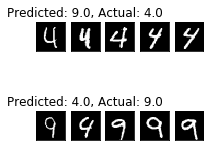

In [50]:
def P5():

### STUDENT START ###
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(mini_train_data, mini_train_labels)   
    knn_predict = neigh.predict(dev_data)
    conf_mat = confusion_matrix(dev_labels, knn_predict)
    print(conf_mat, '\n')
    print ('ANSWER \n')
    print ('The most confused pair of digits are 4 & 9 \n')
    print ('For instance, when the digit is 4, the model predicts it incorrectly as 9 fourteen times \n')
    print ('And when the digit is 9, the model predicts is incorrectly as 4 nine times \n')
    
    mistakes=dev_data[np.logical_and(neigh.predict(dev_data)==9, dev_labels==4)]
    mistakes_label=dev_labels[np.logical_and(neigh.predict(dev_data)==9, dev_labels==4)]
    
    plt.rcParams['figure.figsize'] = 3,3
    for i in range(5):
        plotX=np.reshape(mistakes[i],(-1,28))           
        ax1=plt.subplot(2, 5, i+1)
        ax1.set_xticks([])
        ax1.set_yticks([])
        if(i==1):
            ax1.set_title('Predicted: 9.0, Actual: 4.0')
        plt.imshow(plotX,cmap = 'gray')
        
    mistakes2=dev_data[np.logical_and(neigh.predict(dev_data)==4, dev_labels==9)]
    mistakes2_label=dev_labels[np.logical_and(neigh.predict(dev_data)==4, dev_labels==9)]
    
    for i in range(5):
        plotX2=np.reshape(mistakes2[i],(-1,28))           
        ax1=plt.subplot(2, 5, i+6)
        ax1.set_xticks([])
        ax1.set_yticks([])
        if(i==1):
            ax1.set_title('Predicted: 4.0, Actual: 9.0')
        plt.imshow(plotX2,cmap = 'gray')
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [57]:
def findNeighbors(pixel, edge = 28):
    # Convert index into tuple
    x = int(pixel/edge)
    y = pixel - (x * edge)
    n = [''] * 8
    n[0] = (x-1, y-1)
    n[1] = (x-1, y)
    n[2] = (x-1, y+1)
    n[3] = (x, y-1)
    n[4] = (x, y+1)
    n[5] = (x+1, y-1)
    n[6] = (x+1, y)
    n[7] = (x+1, y+1)
    # Removing pixels not in matrix
    nghb = [n[i] for i in range(8) if n[i][0] >= 0 and n[i][1] >= 0 and n[i][0] < edge and n[i][1] < edge]
    pixels = [nghb[i][0]*edge + nghb[i][1] for i in range(len(nghb))]
    pixels.append(pixel)
    return pixels

def gaus_blur(img):
    gausblr = np.array(img)
    for i in range(len(img)):
        ngbhrs = img[findNeighbors(i)]        # Getting list of neighbors (Max 8; min 3)
        gausblr[i] = sum(ngbhrs) / len(ngbhrs)   # Computing mean of neoghbors and self pixel value 
    return gausblr

def P6():
    
### STUDENT START ###
# Pre-processing train data
    preprocess_train_data = np.array(mini_train_data)
    for i, val in enumerate(preprocess_train_data):
        preprocess_train_data[i] = gaus_blur(val)

# Pre-processing dev data
    preprocess_dev_data = np.array(dev_data)
    for i, val in enumerate(preprocess_dev_data):
        preprocess_dev_data[i] = gaus_blur(val)    
    
# With blurring training only
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(preprocess_train_data, mini_train_labels)
    print ('Accuracy: Blurred training data only:', model.score(dev_data, dev_labels))
    
# With blurring dev data only
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(mini_train_data, mini_train_labels)
    print ('Accuracy: Blurred dev data only:', model.score(preprocess_dev_data, dev_labels)   )
    
# With blurring Blur both dev and training
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(preprocess_train_data, mini_train_labels)
    print ('Accuracy: Blurred both dev and training data:', model.score(preprocess_dev_data, dev_labels) )

### STUDENT END ###

P6()

Accuracy: Blurred training data only: 0.908
Accuracy: Blurred dev data only: 0.871
Accuracy: Blurred both dev and training data: 0.902


In [53]:
def P6():
    
### STUDENT START ###

    image = X[np.random.choice(X.shape[0])]
    #print(len(image))
    dim = int(np.sqrt(len(image)))
    #print(dim.shape)
    #print(dim)
    # Create a copy of the image
    blurred_image = np.copy(image)
    # An array of possible coordinates
    coordinates =np.zeros((dim,dim,2))
    print(coordinates.shape[0])
    for i in range(coordinates.shape[0]):
        for j in range(coordinates.shape[1]):
            coordinates[i,j,0]= i
            coordinates[i,j,1]= j
    # Find the 9 nearest neighbors to a pixel (including itself)
    find_neighbors = KNeighborsClassifier(n_neighbors=9)
    find_neighbors.fit(np.concatenate(coordinates), np.zeros(dim*dim))
                # For each pixel in the image
    for row in range(dim):
        for col in range(dim):
            # The following give us the 9 neighbors and its distances (1st will be 0)
            neighbors = find_neighbors.kneighbors([row,col].reshape(-1,1))
            weights = np.exp(-(np.square(neighbors[0])) / (2*np.square(sigma)))/(2*np.pi*np.square(sigma))
            # Sum of weights = 1
            weights = weights/weights.sum()
            # Create the blurred image as a weighted combination of the original value and the 8 neighboring values
            blurred_image[row*dim+col] = np.average(image[neighbors[1]], weights=weights.tolist())
                
### STUDENT END ###

P6()

28


AttributeError: 'list' object has no attribute 'reshape'

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [10]:
def P7():

### STUDENT START ###
   
    clf = BernoulliNB(alpha=0.1, binarize=0.5)
    clf.fit(mini_train_data, mini_train_labels)
    print ('Accuracy: %3.2f' %clf.score(dev_data, dev_labels))
    
    def binarize_MNB(data):
        for digit in data:
            digit[digit<=0.333]=0            
            digit[np.logical_and(digit>0.333,digit<=0.667)]=1
            digit[digit>0.667]=2                  
        
    mnb = MultinomialNB()
    bin_mini_train_data = mini_train_data
    bin_dev_data = dev_data
    binarize_MNB(bin_mini_train_data)
    binarize_MNB(bin_dev_data)
    mnb.fit(bin_mini_train_data, mini_train_labels)
    print ('Accuracy: %3.2f' %mnb.score(bin_dev_data, dev_labels))
    
### STUDENT END ###

P7()

Accuracy: 0.82
Accuracy: 0.80


ANSWER:

The accuracy values for MultinomialNB doesn't improve over BernoulliNB

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [15]:
def P8(alphas):

### STUDENT START ###

    clf=BernoulliNB(binarize=0.5)
    gscv=GridSearchCV(clf, alphas)
    gscv.fit(mini_train_data,mini_train_labels)
    #sc.predict(dev_data)
    for i in range(len(gscv.grid_scores_)):
        print (gscv.grid_scores_[i])
    print ('\nFor alpha = 0, the accuracy is {0:.3f}.'.format(gscv.grid_scores_[0][1]))
    return gscv 
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

C:\Users\achand2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\achand2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\achand2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


mean: 0.80300, std: 0.01644, params: {'alpha': 0.0}
mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001}
mean: 0.82000, std: 0.02073, params: {'alpha': 0.001}
mean: 0.82100, std: 0.01811, params: {'alpha': 0.01}
mean: 0.81500, std: 0.02013, params: {'alpha': 0.1}
mean: 0.80000, std: 0.01188, params: {'alpha': 0.5}
mean: 0.79500, std: 0.01145, params: {'alpha': 1.0}
mean: 0.78400, std: 0.01934, params: {'alpha': 2.0}
mean: 0.72000, std: 0.02495, params: {'alpha': 10.0}

For alpha = 0, the accuracy is 0.803.


In [16]:
print (nb.best_params_)

{'alpha': 0.01}


ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [23]:
def P9():

### STUDENT END ###
    clf=GaussianNB()
    clf.fit(mini_train_data,mini_train_labels)
    score = clf.score(dev_data, dev_labels)
    print(score)
    
    # Explore which value of sigma maximizes accuracy
    sigmas = np.arange(0.05, 1.05, 0.05)
    accuracies = np.zeros(sigmas.shape)
    for i in range(sigmas.shape[0]):
        new_train_data = mini_train_data + np.random.normal(0,sigmas[i], mini_train_data.shape)
        new_dev_data = dev_data + np.random.normal(0,sigmas[i], mini_train_data.shape)
        clf.fit(new_train_data, mini_train_labels)
        accuracies[i] = clf.score(new_dev_data, dev_labels)
    sigma=sigmas[accuracies.argmax()]
    print ('Best approximate value of sigma: {0:.2f}'.format(sigma))
    # Most common values are still (around) 0 and 1 in the 2nd histogram
    
    new_train_data = mini_train_data + np.random.normal(0,sigma,mini_train_data.shape)
    new_dev_data = dev_data + np.random.normal(0,sigma,mini_train_data.shape)
    clf.fit(new_train_data, mini_train_labels)
    print ('Accuracy of new GaussianNB = {0}'.format(clf.score(new_dev_data, dev_labels)))
    
    return clf
### STUDENT END ###

gnb = P9()

0.621
0.571
Best approximate value of sigma: 0.20
Accuracy of new GaussianNB = 0.817


ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

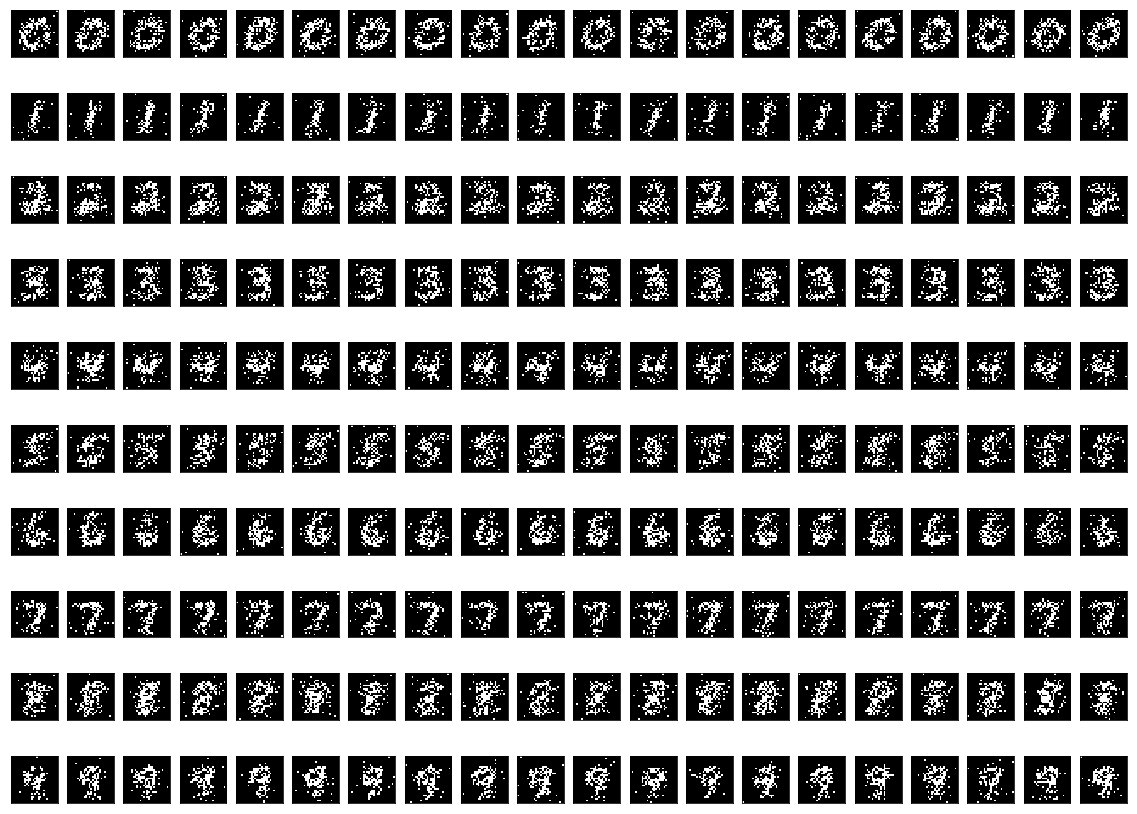

In [36]:
def P10(num_examples):

### STUDENT START ###

    bernoulli_model=BernoulliNB(binarize=0.5)
    bernoulli_model.fit(mini_train_data,mini_train_labels)
    feature_probs=np.exp(bernoulli_model.feature_log_prob_)
    
    plt.rcParams['figure.figsize']=[20,15]
    fig = plt.figure()

    digits=np.random.rand(10,num_examples,784)
    for i in range(10):
        for j in range(num_examples):
            digit=(digits[i][j]<=feature_probs[i])
            image_data=np.reshape(digit,(28,28))
            ax1 = plt.subplot(10,20,i*20+j+1)
            ax1.set_xticks([])
            ax1.set_yticks([])
            plt.imshow(image_data,cmap='gray')    
    
### STUDENT END ###

P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [42]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    clf = BernoulliNB(binarize=0.5)
    clf.fit(mini_train_data, mini_train_labels)
    prediction = clf.predict(dev_data)
    
    prev_bucket = 0
    for bid, bucket in enumerate(buckets):
        for pid, probability in enumerate(clf.predict_proba(dev_data)):
            if (probability.max() <= bucket and probability.max() > prev_bucket):
                total[bid] += 1
                if prediction[pid] == dev_labels[pid]:
                    correct[bid] += 1
        prev_bucket = bucket
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  35    accuracy = 0.457
p(pred) <= 0.9990000000000    total =  98    accuracy = 0.449
p(pred) <= 0.9999900000000    total =  87    accuracy = 0.632
p(pred) <= 0.9999999000000    total =  76    accuracy = 0.684
p(pred) <= 0.9999999990000    total =  90    accuracy = 0.833
p(pred) <= 0.9999999999900    total =  88    accuracy = 0.841
p(pred) <= 0.9999999999999    total =  69    accuracy = 0.841
p(pred) <= 1.0000000000000    total = 457    accuracy = 0.965


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()